### Importing Dependencies

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

### Data Collection and Processing

In [6]:
iris_data=pd.read_csv("iris_dataset.csv")
print(iris_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [6]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris_data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [8]:
iris_data.shape

(150, 5)

In [9]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

### Splitting the data and Target

In [12]:
x=iris_data.drop(["target"],axis=1)
y=iris_data["target"]

In [14]:
print(x)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [15]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


### Splitting Training and Test data

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

### Model Training

In [14]:
tree_model=DecisionTreeClassifier(max_depth=2)

In [16]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

<Figure size 1500x1000 with 0 Axes>

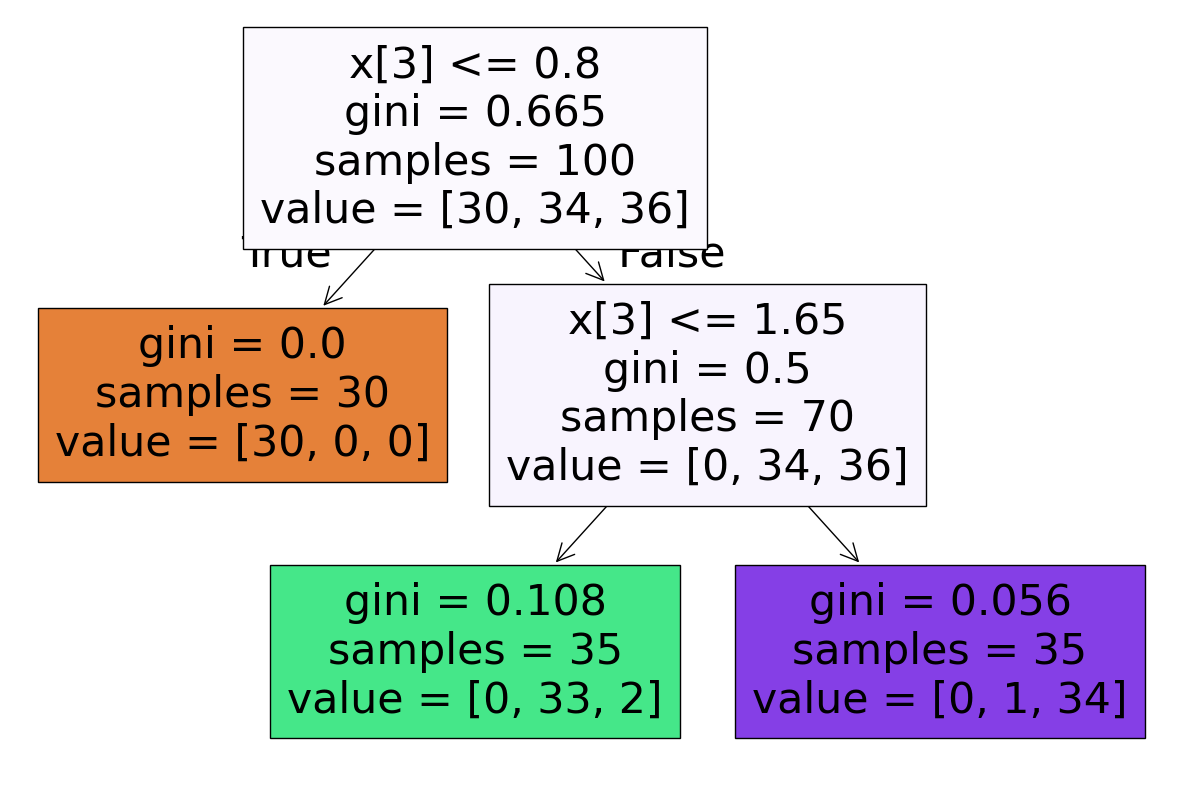

In [17]:
plt.figure(figsize=(15,10))
tree.plot_tree(tree_model,filled=True)
plt.show()

### Model Evaluation

In [18]:
x_test_prediction=tree_model.predict(x_test)
print(x_test_prediction)

[0 0 2 0 0 1 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 1 1 2 1 1 2 1 0 1 0 1 0 0]


### Performance Metrics

In [19]:
score=accuracy_score(x_test_prediction,y_test)
print(score)

0.94


In [20]:
print(classification_report(x_test_prediction,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.94      0.88      0.91        17
           2       0.86      0.92      0.89        13

    accuracy                           0.94        50
   macro avg       0.93      0.94      0.93        50
weighted avg       0.94      0.94      0.94        50



### HyperParameter Tunning

In [26]:
# PrePrunning
parameter={
    "criterion":["gini","entropy","log_loss"],
    "splitter":["best","random"],
    "max_depth":[1,2,3,4,5],
    "max_features":["auto","sqrt","log2"]
}

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
tree_model=DecisionTreeClassifier(max_depth=2)
cv=GridSearchCV(tree_model,param_grid=parameter,cv=5,scoring="accuracy")

In [30]:
cv.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packag

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [31]:
print("Best Parameters:", cv.best_params_)
print("Best Score:", cv.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'best'}
Best Score: 0.97


In [32]:
best_tree = cv.best_estimator_
y_test_pred = best_tree.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.94        50
   macro avg       0.94      0.93      0.93        50
weighted avg       0.94      0.94      0.94        50

